<a href="https://colab.research.google.com/github/Harsh28-raj/ml_projects/blob/main/credit_crd_frd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
import numpy as np

In [177]:
df = pd.read_csv("/content/dataset(1).csv")

In [178]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [179]:
df.sample()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
916220,916220,2019-12-30 01:35:51,4292743669224718067,fraud_Wiegand-Lowe,grocery_net,44.56,Michael,Williams,M,35822 Clayton Street Apt. 679,...,38.2674,-76.4954,5927,Art therapist,1973-06-09,644426efb05adf3bd7100f633e74d71e,1356831351,38.843571,-75.525556,0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [181]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [182]:
df.sample(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
74281,74281,2019-02-12 23:53:39,3511378610369890,"fraud_Kunze, Larkin and Mayert",travel,2.35,James,Cooper,M,663 Ramirez Trace Apt. 951,...,34.7789,-86.5438,190178,Television production assistant,1973-04-01,1ab9d289fdaca384f7f1d29fb6880020,1329090819,33.785802,-87.511391,0
292252,292252,2019-05-24 01:32:28,4355790796238264643,fraud_Koepp-Witting,grocery_pos,149.73,Tanner,Davis,M,2632 Stevens Light Apt. 213,...,39.8153,-91.2627,1656,Exhibition designer,1969-08-04,b0426a6dc2ed0adfc5dd34c39f4b864b,1337823148,40.431296,-91.460621,0


In [183]:
drop_cols = [
    "cc_num",
    "first",
    "last",
    "street",
    "city",
    "job",
    "merchant",
    "trans_num",
    "dob",
    "trans_date_trans_time"
]

In [184]:
df=df.drop(columns=drop_cols)

In [185]:
df = df.drop(columns=["Unnamed: 0"])


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  object 
 3   state       1296675 non-null  object 
 4   zip         1296675 non-null  int64  
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 118.7+ MB


In [187]:
df["is_fraud"].value_counts(normalize=True)

,proportion
is_fraud,
0,0.994211
1,0.005789


In [188]:
df.isnull().sum().sort_values(ascending=False)

,0
category,0
amt,0
gender,0
state,0
zip,0
lat,0
long,0
city_pop,0
unix_time,0
merch_lat,0


In [189]:
df.sample(5)

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
948941,personal_care,2.26,F,NJ,7060,40.6152,-74.4150,71485,1358206788,41.265592,-74.426746,0
883771,misc_net,81.60,F,KY,41812,37.2409,-82.7696,230,1356210931,37.417926,-82.096809,0
1120102,food_dining,72.55,M,TX,77971,28.7724,-96.4793,911,1365700735,29.572265,-96.491209,0
583467,shopping_pos,43.70,F,PA,19149,40.0369,-75.0664,1526206,1346762900,40.233868,-75.757452,0
637126,shopping_pos,9.20,F,MD,21872,38.4121,-75.2811,718,1348845062,38.324553,-75.888995,0


0=normal transaction


1=fraud transaction


In [190]:
df.is_fraud.value_counts()

,count
is_fraud,
0,1289169
1,7506


In [191]:

count = [0, 10, 50, 100, 500, 1000, np.inf]
range = ["0-10", "10-50", "50-100", "100-500", "500-1000", "1000+"]

amt_bins = pd.cut(df["amt"], bins=count, labels=range, include_lowest=True)

amt_bins.value_counts().sort_index()


,count
amt,
0-10,335929
10-50,336370
50-100,389483
100-500,219262
500-1000,11695
1000+,3936


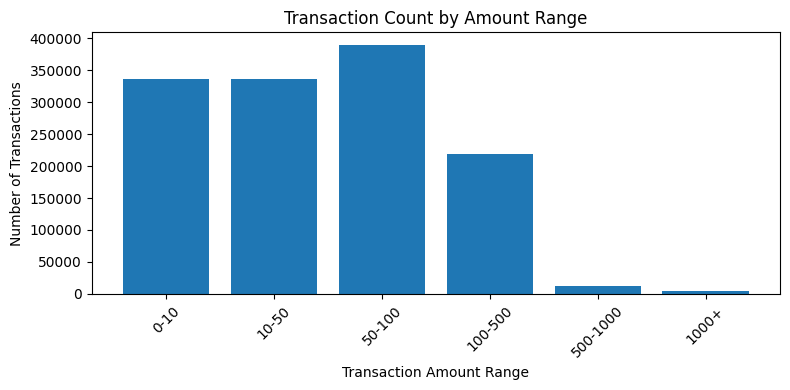

In [192]:
import matplotlib.pyplot as plt

# Count transactions in each bin
amt_counts = amt_bins.value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
plt.bar(amt_counts.index.astype(str), amt_counts.values)
plt.xlabel("Transaction Amount Range")
plt.ylabel("Number of Transactions")
plt.title("Transaction Count by Amount Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4232988211.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby("amt_range")["is_fraud"].mean()


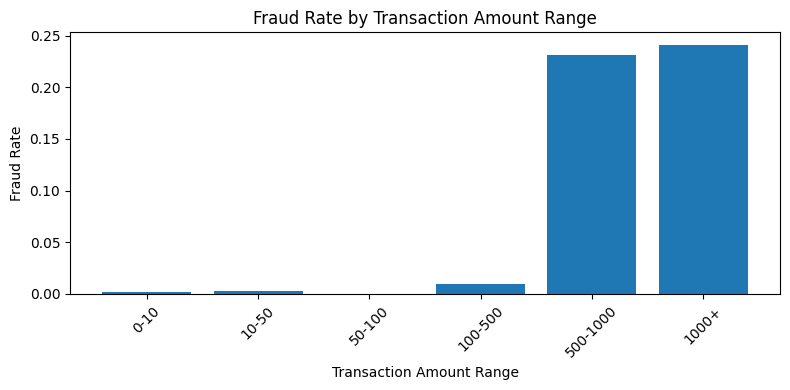

In [193]:
df["amt_range"] = amt_bins

fraud_rate = df.groupby("amt_range")["is_fraud"].mean()

plt.figure(figsize=(8, 4))
plt.bar(fraud_rate.index.astype(str), fraud_rate.values)
plt.xlabel("Transaction Amount Range")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Transaction Amount Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretation (THIS IS GOLD 🥇)

✔ High-value transactions have much higher fraud probability


✔ Fraudsters target large amounts

✔ Model must treat high amounts differently

This is EXACTLY what banks see in real data.

In [194]:
df["category"].value_counts().sort_values(ascending=False)


,count
category,
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758


In [195]:
df.groupby("gender")["is_fraud"].mean()


,is_fraud
gender,
F,0.005262
M,0.006426


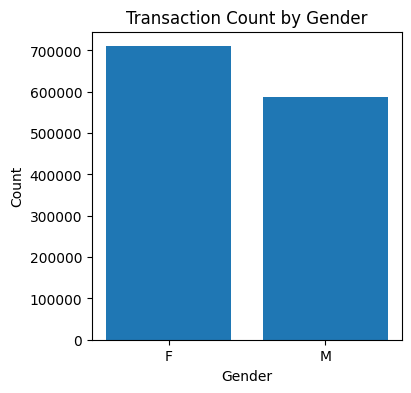

In [196]:
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(4,4))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Transaction Count by Gender")
plt.show()


In [197]:
df.head()

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_range
0,misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0-10
1,grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,100-500
2,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,100-500
3,gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,10-50
4,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,10-50
